<a href="https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/ch14_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#로지스틱 회귀

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.datasets import make_classification

In [0]:
# For reproducibility
np.random.seed(1000)

nb_samples = 500

In [0]:
# Create the dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_redundant=0, n_classes=2)

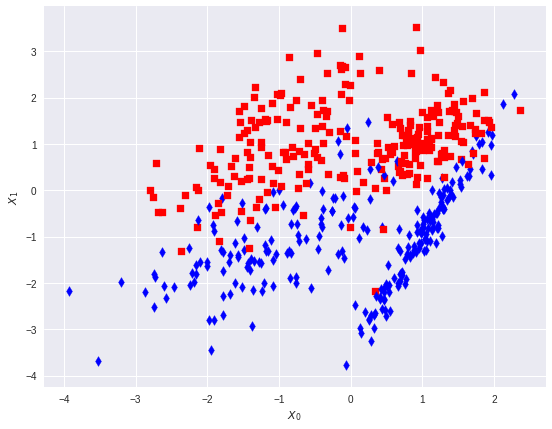

In [72]:
# Plot the dataset
fig, ax = plt.subplots(figsize=(9, 7))
ax.set_xlabel(r'$X_0$')
ax.set_ylabel(r'$X_1$')

for i, x in enumerate(X):
    if Y[i] == 0:
        ax.scatter(x[0], x[1], marker='d', color='blue')
    else:
        ax.scatter(x[0], x[1], marker='s', color='red')

plt.show()

In [74]:
# Create the graph
graph = tf.Graph()

with graph.as_default():
    Xt = tf.placeholder(tf.float32, shape=(None, 2), name='points')
    Yt = tf.placeholder(tf.float32, shape=(None, 1), name='classes')

    W = tf.Variable(tf.zeros((2, 1)), name='weights')
    bias = tf.Variable(tf.zeros((1, 1)), name='bias')

    Ye = tf.matmul(Xt, W) + bias
    Yc = tf.round(tf.sigmoid(Ye))

    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Ye, labels=Yt))
    training_step = tf.train.GradientDescentOptimizer(0.025).minimize(loss)

session = tf.InteractiveSession(graph=graph)
tf.global_variables_initializer().run()

feed_dict = {
    Xt: X,
    Yt: Y.reshape((nb_samples, 1))
}
for i in range(10000):
    loss_value, _ = session.run([loss, training_step], feed_dict=feed_dict)
    if i % 100 == 0:
        print('Step %d, Loss: %.3f' % (i, loss_value))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step 0, Loss: 0.693
Step 100, Loss: 0.418
Step 200, Loss: 0.352
Step 300, Loss: 0.322
Step 400, Loss: 0.304
Step 500, Loss: 0.293
Step 600, Loss: 0.285
Step 700, Loss: 0.279
Step 800, Loss: 0.275
Step 900, Loss: 0.272
Step 1000, Loss: 0.269
Step 1100, Loss: 0.267
Step 1200, Loss: 0.265
Step 1300, Loss: 0.264
Step 1400, Loss: 0.263
Step 1500, Loss: 0.262
Step 1600, Loss: 0.261
Step 1700, Loss: 0.260
Step 1800, Loss: 0.260
Step 1900, Loss: 0.259
Step 2000, Loss: 0.259
Step 2100, Loss: 0.258
Step 2200, Loss: 0.258
Step 2300, Loss: 0.258
Step 2400, Loss: 0.258
Step 2500, Loss: 0.257
Step 2600, Loss: 0.257
Step 2700, Loss: 0.257
Step 2800, Loss: 0.257
Step 2900, Loss: 0.257
Step 3000, Loss: 0.257
Step 3100, Loss: 0.256
Step 3200, Loss: 0.256
Step 3300, Loss: 0.256
Step 3400, Loss: 0.256
Step 3500, Loss: 0.256
Step 3600, Loss: 0.256
Step 3700, Loss: 0.256
Step 3800, Loss: 0.256
Step 3900, Loss: 0.256
Step 4000, Loss: 0.256
Step 4100, Loss: 0.256
Step 4200, Loss: 0.256
Step 4300, Loss: 0.256


In [75]:
# Retrieve coefficients and intercept
Wc, Wb = W.eval(), bias.eval()

print('Coefficients:')
print(Wc)

print('Intercept:')
print(Wb)

Coefficients:
[[-1.190798]
 [ 3.152102]]
Intercept:
[[-0.13232733]]


In [0]:
# Plot the dataset with the separating hyperplane
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = np.array(session.run([Yc], feed_dict={Xt: np.c_[xx.ravel(), yy.ravel()]}))

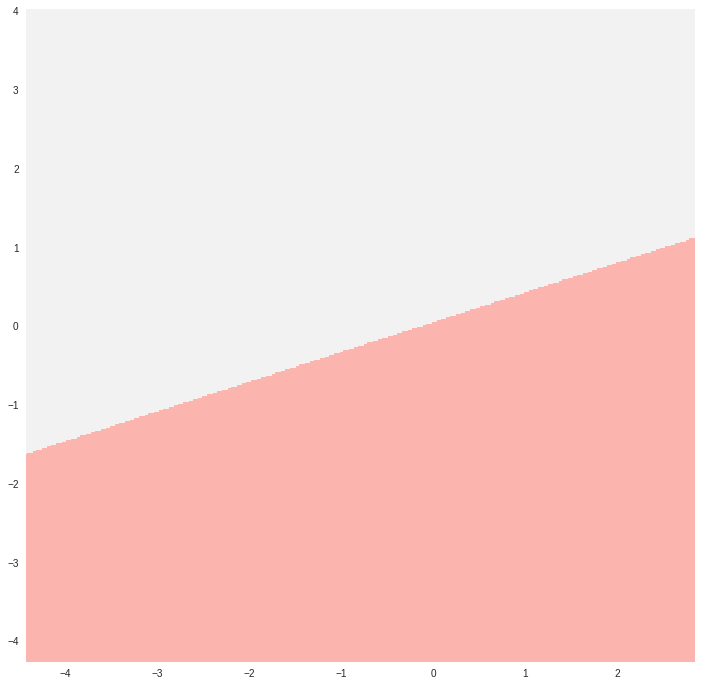

In [77]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 12))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

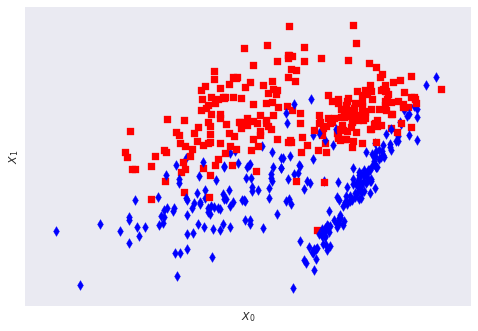

In [78]:
# Plot also the training points
for i, x in enumerate(X):
    if Y[i] == 0:
        plt.scatter(x[0], x[1], marker='d', color='blue')
    else:
        plt.scatter(x[0], x[1], marker='s', color='red')

plt.xlabel(r'$X_0$')
plt.ylabel(r'$X_1$')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()